# Reconstruction using masks

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.path.exists("/content")

True

In [32]:
def upsample_image(idx):
  if os.path.exists(f"/content/drive/MyDrive/ACV_Project/sample_data/LABELS/masks_imgs/{idx}.jpg") and os.path.exists(f"/content/drive/MyDrive/ACV_Project/sample_data/INFERENCE_DATA/{idx}.jpg"):

    mask = cv2.imread(f"/content/drive/MyDrive/ACV_Project/sample_data/LABELS/masks_imgs/{idx}.jpg")
    # mask = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)
    # mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=1)
    image1 = cv2.imread(f"/content/drive/MyDrive/ACV_Project/sample_data/INFERENCE_DATA/{idx}.jpg")
    image2 = cv2.imread(f"/content/drive/MyDrive/ACV_Project/sample_data/STICHED_IMAGES/{idx}.jpg")
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
    mask = cv2.resize(mask, (image2.shape[1], image2.shape[0]))
    # mask = cv2.erode(mask, np.ones((5, 5), np.uint8), iterations=1)
    # mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=1)
    new_one = image1*((~mask)//255) + image2*((mask)//255)
  else:
    new_one = cv2.imread(f"/content/drive/MyDrive/ACV_Project/sample_data/STICHED_IMAGES/{idx}.jpg")
  cv2.imwrite(f"{idx}.jpg", new_one)

# upsample_image(15)
for idx in range(20):
  upsample_image(idx)


In [33]:
!cp *.jpg "/content/drive/MyDrive/ACV_Project/sample_data/FINAL_ONES/"

In [ ]:
image1 = cv2.imread("/content/drive/MyDrive/ACV_Project/sample_data/INFERENCE_DATA/0.jpg")
height, width, _ = image1.shape

In [ ]:
image1.shape

(512, 1024, 3)

In [ ]:
image2 = cv2.imread("/content/drive/MyDrive/ACV_Project/sample_data/STICHED_IMAGES/0.jpg")
height, width, _ = image2.shape

In [ ]:
image2.shape

(2048, 4096, 3)

In [5]:
mask = cv2.imread("/content/drive/MyDrive/ACV_Project/sample_data/LABELS/masks_imgs/0.jpg")
height, width, _ = mask.shape

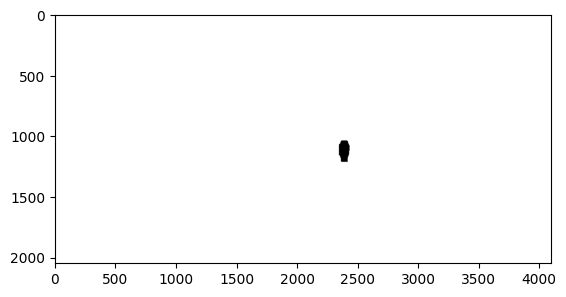

In [11]:
plt.imshow(cv2.erode(mask, np.ones((21, 21), np.uint8), iterations=2))

In [ ]:
mask.shape

(2048, 4096, 3)

In [ ]:
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
mask = cv2.resize(mask, (image2.shape[1], image2.shape[0]))

In [ ]:
new_one = image1*((~mask)//255) + image2*((mask)//255)

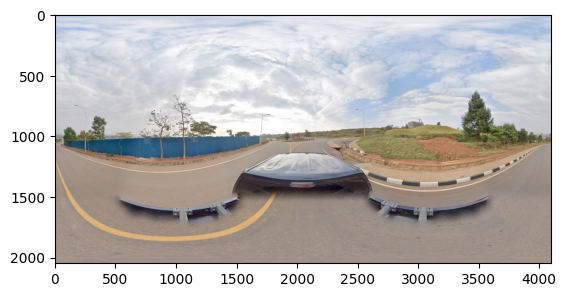

In [ ]:
plt.imshow(cv2.cvtColor(new_one, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite("0.jpg", new_one)

True

In [ ]:

# def blend_images(img1, img2, mask):
#     # Generate Gaussian pyramid for img1
#     img1_copy = img1.copy()
#     gp_img1 = [img1_copy]
#     for i in range(6):
#         img1_copy = cv2.pyrDown(img1_copy)
#         gp_img1.append(img1_copy)

#     # Generate Gaussian pyramid for img2
#     img2_copy = img2.copy()
#     gp_img2 = [img2_copy]
#     for i in range(6):
#         img2_copy = cv2.pyrDown(img2_copy)
#         gp_img2.append(img2_copy)

#     # Generate Gaussian pyramid for mask
#     mask_copy = mask.copy()
#     gp_mask = [mask_copy]
#     for i in range(6):
#         mask_copy = cv2.pyrDown(mask_copy)
#         gp_mask.append(mask_copy)

#     # Create Laplacian pyramid for img1
#     lp_img1 = [gp_img1[5]]
#     for i in range(5, 0, -1):
#         expanded = cv2.pyrUp(gp_img1[i])
#         laplacian = cv2.subtract(gp_img1[i - 1], expanded)
#         lp_img1.append(laplacian)

#     # Create Laplacian pyramid for img2
#     lp_img2 = [gp_img2[5]]
#     for i in range(5, 0, -1):
#         expanded = cv2.pyrUp(gp_img2[i])
#         laplacian = cv2.subtract(gp_img2[i - 1], expanded)
#         lp_img2.append(laplacian)

#     # Create blended Laplacian pyramid
#     blended_lp = []
#     for l1, l2, mask_level in zip(lp_img1, lp_img2, (gp_mask)):
#         mask_level = cv2.resize(mask_level, (l2.shape[1], l2.shape[0]))
#         blended_level = l1 * (1 - mask_level) + l2 * mask_level
#         blended_lp.append(blended_level)

#     # Reconstruct the blended image from the Laplacian pyramid
#     blended_img = blended_lp[0]
#     for i in range(1, 6):
#         blended_img = cv2.pyrUp(blended_img)
#         blended_img = cv2.add(blended_img, blended_lp[i])

#     return blended_img

def blend_images(img1, img2, mask):
    # Generate Gaussian pyramid for img1
    img1_copy = img1.copy()
    gp_img1 = [img1_copy]
    for i in range(6):
        img1_copy = cv2.pyrDown(img1_copy)
        gp_img1.append(img1_copy)

    # Generate Gaussian pyramid for img2
    img2_copy = img2.copy()
    gp_img2 = [img2_copy]
    for i in range(6):
        img2_copy = cv2.pyrDown(img2_copy)
        gp_img2.append(img2_copy)

    # Generate Gaussian pyramid for mask
    mask_copy = mask.copy()
    gp_mask = [mask_copy]
    for i in range(6):
        mask_copy = cv2.pyrDown(mask_copy)
        gp_mask.append(mask_copy)

    # Create Laplacian pyramid for img1
    lp_img1 = [gp_img1[5]]
    for i in range(5, 0, -1):
        expanded = cv2.pyrUp(gp_img1[i])
        laplacian = cv2.subtract(gp_img1[i - 1], expanded)
        lp_img1.append(laplacian)

    # Create Laplacian pyramid for img2
    lp_img2 = [gp_img2[5]]
    for i in range(5, 0, -1):
        expanded = cv2.pyrUp(gp_img2[i])
        laplacian = cv2.subtract(gp_img2[i - 1], expanded)
        lp_img2.append(laplacian)

    # Create blended Laplacian pyramid
    blended_lp = []
    for l1, l2, mask_level in zip(lp_img1, lp_img2, gp_mask):
        mask_level = cv2.resize(mask_level, (l2.shape[1], l2.shape[0]))
        blended_level = l1 * (1 - mask_level) + l2 * mask_level
        blended_lp.append(blended_level)

    # Reconstruct the blended image from the Laplacian pyramid
    blended_img = blended_lp[0]
    for i in range(1, 6):
        blended_img = cv2.pyrUp(blended_img)
        blended_img = cv2.add(blended_img, blended_lp[i])

    return blended_img

# Resize images and mask to the same size
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
mask = cv2.resize(mask, (image2.shape[1], image2.shape[0]))

# Blend images
blended_image = blend_images(image1, image2, ~mask[:,:,:])

# Save the blended image
cv2.imwrite("blended_image.jpg", blended_image)

# Print a success message
print("Images blended seamlessly and saved as blended_image.jpg")


Images blended seamlessly and saved as blended_image.jpg


In [ ]:
mask.shape

(2048, 4096, 3)

In [ ]:
image1.shape

(2048, 4096, 3)

In [ ]:
img_patch_removed = cv2.bitwise_and(image, image, mask=mask[:,:,1]) #.astype(np.uint8)

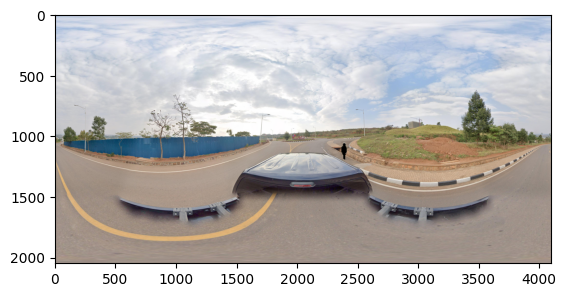

In [ ]:
plt.imshow(cv2.cvtColor(img_patch_removed, cv2.COLOR_BGR2RGB))

In [ ]:
img_patch = cv2.bitwise_and(image, image, mask=~mask[:,:,1])

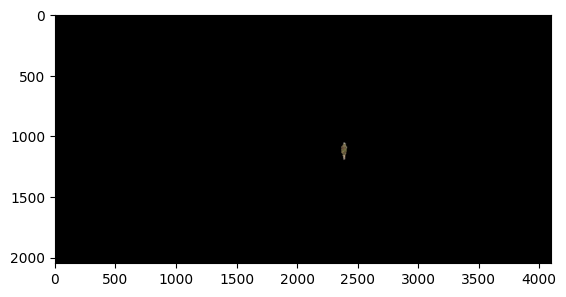

In [ ]:
plt.imshow(cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB))

In [ ]:
def upsample(resized_down):
  resized_down_normalized = (cv2.cvtColor(resized_down, cv2.COLOR_BGR2RGB))
  low_resolution_image = tf.expand_dims(resized_down_normalized,0)# Low Resolution Image of shape [batch_size, height, width, 3]
  low_resolution_image = tf.cast(low_resolution_image, tf.float32)#/255
  # low_resolution_image = normalize(low_resolution_image)
  super_resolution = model(low_resolution_image) # Perform Super Resolution here
  img_np = super_resolution[0].numpy()
  # print(img_np.min())
  max, min = img_np.max(), img_np.min()
  img = (((img_np-min)/(max-min)))
  img = np.clip(2.5*img**2, 0, 1)
  img = (img*255).astype(np.uint8)
  return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [ ]:
pyramid_levels= 2
reference_img_list = []
reference_img_list.append(img_patch_removed.copy())
masks_list = []
masks_list.append(mask)
final_patch = img_patch.copy()
for i in range(pyramid_levels):
  previous_layer = reference_img_list[-1]
  new_height, new_width, _ = previous_layer.shape
  new_layer = cv2.resize(previous_layer, (new_width//4, new_height//4), interpolation=cv2.INTER_CUBIC)
  reference_img_list.append(new_layer)
  final_patch = cv2.resize(final_patch, (new_width//4, new_height//4), interpolation=cv2.INTER_CUBIC)
  previous_mask = masks_list[-1]
  new_mask = cv2.resize(previous_mask, (new_width//4, new_height//4), interpolation=cv2.INTER_CUBIC)
  masks_list.append(new_mask)
mask_index = -2
for i in range(pyramid_levels+1):
  reference_img = reference_img_list.pop()
  final_pat = final_patch + reference_img
  final_patch = upsample(final_pat)
  final_patch = cv2.bitwise_and(final_patch, final_patch, mask=~masks_list[mask_index][:,:,1])
  mask_index-=1



ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (2 total):
    * <tf.Tensor 'inputs:0' shape=(1, 128, 256, 3) dtype=float16>
    * False
  Keyword arguments: {}

 Expected these arguments to match one of the following 2 option(s):

Option 1:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_0')
    * True
  Keyword arguments: {}

Option 2:
  Positional arguments (2 total):
    * TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_0')
    * False
  Keyword arguments: {}

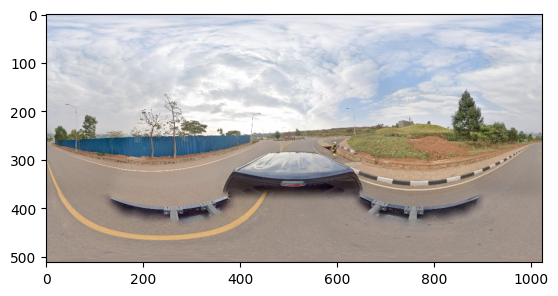

In [ ]:
plt.imshow(cv2.cvtColor(final_pat, cv2.COLOR_BGR2RGB))

In [ ]:
img_ = upsample(resized_down)

In [ ]:
img_.shape

(2048, 4096, 3)

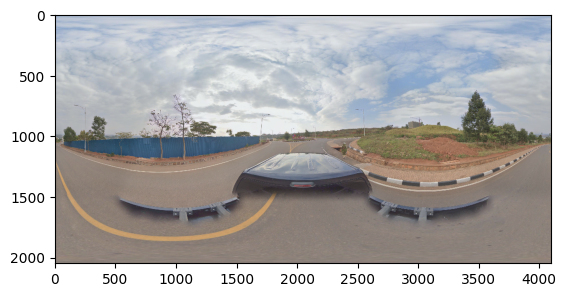

In [ ]:
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))

In [ ]:
# Downscale the image using custom width and height
down_width, down_height = width//4, height//4
resized_down = cv2.resize(image, (down_width, down_height), interpolation=cv2.INTER_CUBIC)

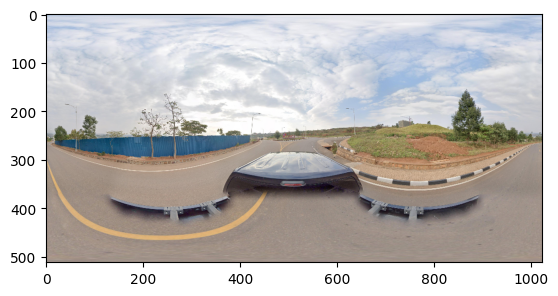

In [ ]:
plt.imshow(cv2.cvtColor(resized_down, cv2.COLOR_BGR2RGB))

In [ ]:
# tf.expand_dims(img,0).shape

In [ ]:
# To add an extra dimension for batch, use tf.expand_dims()
resized_down_normalized = (cv2.cvtColor(resized_down, cv2.COLOR_BGR2RGB))
low_resolution_image = tf.expand_dims(resized_down_normalized,0)# Low Resolution Image of shape [batch_size, height, width, 3]
low_resolution_image = tf.cast(low_resolution_image, tf.float32)#/255
# low_resolution_image = normalize(low_resolution_image)
super_resolution = model(low_resolution_image) # Perform Super Resolution here


In [ ]:
max = super_resolution[0].numpy().max()
min = super_resolution[0].numpy().min()
mean = super_resolution[0].numpy().mean()
std = super_resolution[0].numpy().std()


In [ ]:
def normalize(img):
  img = (((img-min)/(max-min)))
  return np.clip(2.5*img**2, 0, 1)

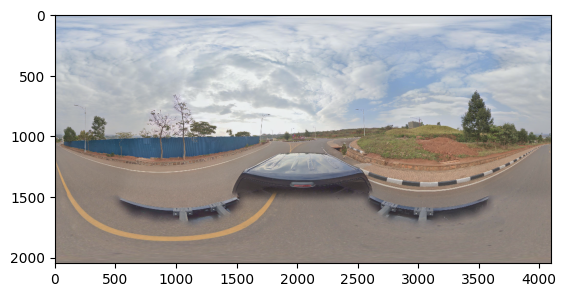

In [ ]:
plt.imshow(normalize(super_resolution[0].numpy()))

In [ ]:
# plt.imsave("img.jpg",array)

In [ ]:
# retraining the model
# import tensorflow_hub as hub
# import tensorflow as tf
# generator = tf.keras.models.Sequential([
#     hub.KerasLayer("https://kaggle.com/models/kaggle/esrgan-tf2/frameworks/TensorFlow2/variations/esrgan-tf2/versions/1", trainable=True),
#     tf.keras.layers.Conv2D(filters=3, kernel_size=[1, 1], strides=[1, 1])
# ])
